In [1]:
# import gc
# import tensorflow as tf

# del model  # Delete model instance
# gc.collect()  # Force garbage collection
# tf.keras.backend.clear_session()  # Clear TensorFlow session


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=15
CHANNELS=3

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 9368 files belonging to 12 classes.


 class Names are the folders name 👇

In [5]:
class_names=dataset.class_names
class_names

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Potato___Bacteria',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___healthy']

In [82]:
len(dataset)    # ~ 177*32

625

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    #  here 3 is RGB
    #12 CLASS REPRESENT FORM 0 TO 11. EACH NUMBER REPRESENT EACH CLASS

(15, 256, 256, 3)
[ 6  4  6  8 11  9 11  8 11  4 10 11 11  4  9]


# NOT NECESSARY TO RUN IT JUST FOR VIE IMAGES


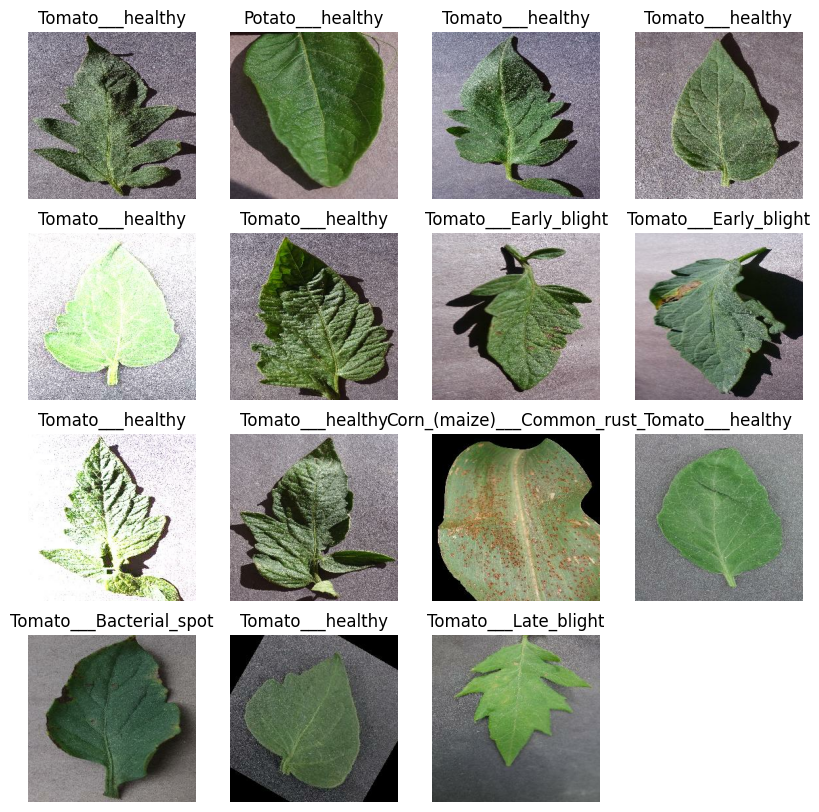

In [8]:
# Fetch a batch of images
import math
import matplotlib.pyplot as plt

# Fetch a batch of images
image_batch, label_batch = next(iter(dataset))

# Get actual batch size
actual_batch_size = image_batch.shape[0]

# Define grid dynamically
cols = 4  # Number of columns
rows = math.ceil(actual_batch_size / cols)  # Calculate number of rows required

plt.figure(figsize=(10, 10))
for i in range(actual_batch_size):  # Loop through the actual batch size
    ax = plt.subplot(rows, cols, i + 1)  # Adjust rows dynamically
    plt.imshow(image_batch[i].numpy().astype("uint8"))  # Display the image
    plt.title(class_names[label_batch[i]])
    plt.axis("off")
plt.show()




# SPLIT DATA FOR TRANING AND TESTING


80%==>TRANING

20%==> 10%-> VALIDATION 10%->TESTING

train_test_split=> it present in stastical dats set in tensorflo e dont have that

# manuel extra code

In [9]:
train_size=0.8
len(dataset)*train_size

500.0

In [10]:
train_ds = dataset.take(1757)
len(train_ds)

625

In [ ]:

test_ds=dataset.skip(54)
len(test_ds)

571

In [12]:
val_size=0.1
len(dataset)*val_size
#so we need 17 sample form my test dataset

62.5

In [13]:
val_ds = test_ds.take(17)
len(val_ds)
# we take 17 data for validation and skip this 17 data

17

ACTUAL TEST DATASET

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

565

# automatic simple code

previous separated code into wrap into a single function

In [15]:
def get_dataset_partations_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle= True,shuffle_size=10000):

    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

DEVIDE CODE FOR train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds = get_dataset_partations_tf(dataset)

In [17]:
len(train_ds),len(val_ds),len(test_ds)

(500, 62, 63)

# Create a layers for preprocessing

~study about resize and rescalling, data augmentation , convolutional nural network~

In [18]:
#optimising for traning purposes
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Flip images randomly
    layers.RandomRotation(0.2),  # Rotate images by 20%
    layers.RandomBrightness(0.2),
    layers.RandomZoom(0.2),  # Randomly zoom into images
    layers.RandomContrast(0.2)  # Adjust contrast
])



NN architecture

In [21]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Remove BATCH_SIZE
n_classes = len(class_names) 

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Reduce
    # class_names should be a list of category names

    layers.Dense(n_classes, activation='softmax'),
])

# Build the model using the batch size from training data
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))


 *check summery*
  
Total params: 896,323 - this is the trainable data .





In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)      

The model.compile method configures the model for training by specifying the optimizer (adam), loss function (SparseCategoricalCrossentropy for multi-class classification with integer labels), and evaluation metric (accuracy).

In [23]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Increased learning rate
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Define Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', patience=3, factor=0.5, verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Increased epochs to allow better learning
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/10
500/500 [==============================] - 263s 418ms/step - loss: 1.2538 - accuracy: 0.5668 - val_loss: 0.7654 - val_accuracy: 0.7280 - lr: 0.0010
Epoch 2/10
500/500 [==============================] - 212s 424ms/step - loss: 0.7452 - accuracy: 0.7384 - val_loss: 0.4370 - val_accuracy: 0.8398 - lr: 0.0010
Epoch 3/10
500/500 [==============================] - 146s 291ms/step - loss: 0.5601 - accuracy: 0.8058 - val_loss: 0.3546 - val_accuracy: 0.8731 - lr: 0.0010
Epoch 4/10
500/500 [==============================] - 143s 287ms/step - loss: 0.4484 - accuracy: 0.8444 - val_loss: 0.3172 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/10
500/500 [==============================] - 136s 272ms/step - loss: 0.3405 - accuracy: 0.8828 - val_loss: 0.1641 - val_accuracy: 0.9495 - lr: 0.0010
Epoch 6/10
500/500 [==============================] - 181s 362ms/step - loss: 0.2941 - accuracy: 0.9023 - val_loss: 0.1088 - val_accuracy: 0.9645 - lr: 0.0010
Epoch 7/10
500/500 [==========================

In [ ]:
# model.save_weights("train_model_weights.h5")

In [25]:
scores=model.evaluate(test_ds)

63/63 [==============================] - 9s 143ms/step - loss: 0.0609 - accuracy: 0.9820


In [79]:
scores

[0.06090223044157028, 0.9820106029510498]

# Just testing (ignore)

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 500}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [31]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Visualise Data 

* here 1 fig says how accureacy increace and 2fig says how error reduce.

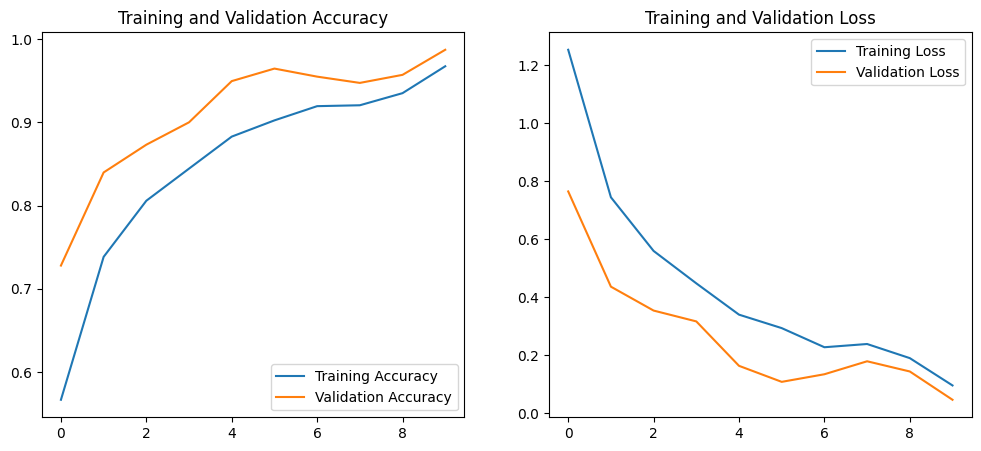

In [81]:
# Extract Accuracy & Loss for Plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # Match actual number of recorded epochs

# Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()


# ____________________________________________________

First image to predict:


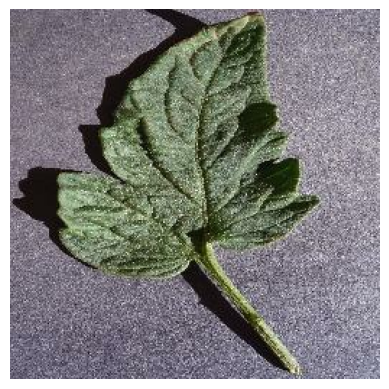

actual label: Tomato___healthy
1/1 [==============================] - 0s 63ms/step
Predicted labels: Tomato___healthy


In [93]:
for image_batch, label_batch in test_ds.take(1):
    # Extract the first image and label
    first_image = image_batch[0].numpy().astype('uint8')  # .astype('uint8') is used to ensure the pixel values are in the expected range for image display (0-255).
    first_label = label_batch[0].numpy()  # Extract the actual label

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis('off') 
    plt.show()
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted labels:",class_names[np.argmax(batch_prediction[0])])




In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predictions
true_labels = []
predictions = []

for image_batch, label_batch in test_ds:
    true_labels.extend(label_batch.numpy())  # Store actual labels
    batch_predictions = model.predict(image_batch)  # Predict batch
    predicted_labels = np.argmax(batch_predictions, axis=1)  # Get predicted class index
    predictions.extend(predicted_labels)  # Store predicted labels

true_labels = np.array(true_labels)  # ✅ Don't use np.argmax
predictions = np.array(predictions)

num_classes = len(np.unique(true_labels))

print("\nClassification Report:\n")
print(classification_report(true_labels, predictions, target_names=class_names[:num_classes], digits=4))

print("\nConfusion Matrix:\n")
print(confusion_matrix(true_labels, predictions))


1/1 [==============================] - 0s 26ms/step

Classification Report:

                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     1.0000    0.8889    0.9412        18
                       Corn_(maize)___Common_rust_     1.0000    1.0000    1.0000        24
               Corn_(maize)___Northern_Leaf_Blight     0.8667    0.8667    0.8667        15
                            Corn_(maize)___healthy     1.0000    1.0000    1.0000        15
                                 Potato___Bacteria     0.9623    0.9808    0.9714        52
                             Potato___Early_blight     1.0000    0.8889    0.9412        27
                              Potato___Late_blight     1.0000    0.8889    0.9412        18
                                  Potato___healthy     1.0000    1.0000    1.0000        14
                           Tomato___Bacterial_spot     0.9933    0.9933    0.9933       150
  

wrap previous code into a function

In [ ]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)

    img_array = img_array / 255.0  

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence



1/1 [==============================] - 0s 331ms/step


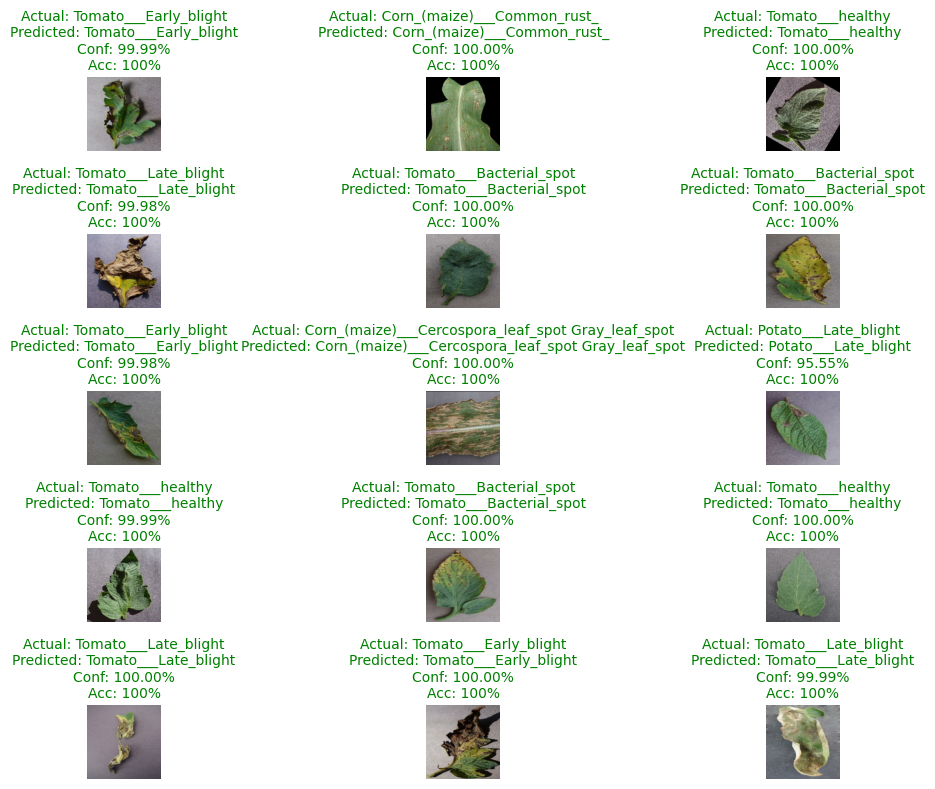

In [98]:
# import matplotlib.pyplot as plt
# import numpy as np
# import math

# for image_batch, label_batch in test_ds.take(1):  
#     predictions = model.predict(image_batch)
#     batch_size = len(image_batch)
    
#     cols = 3
#     rows = math.ceil(batch_size / cols)

#     plt.figure(figsize=(12, 8))
#     for i in range(batch_size):  
#         plt.subplot(rows, cols, i + 1)
#         img = image_batch[i].numpy().astype("uint8")
#         true_label_index = label_batch[i].numpy()
#         true_label = class_names[true_label_index] 
#         predicted_index = np.argmax(predictions[i])
#         predicted_label = class_names[predicted_index]  
#         confidence = np.max(predictions[i]) * 100 

#         image_accuracy = 100 if true_label == predicted_label else 0

#         plt.imshow(img)
#         plt.axis("off")  
#         plt.title(f"Actual: {true_label}\nPredicted: {predicted_label}\nConf: {confidence:.2f}%\nAcc: {image_accuracy}%", 
#                   fontsize=10, 

#                   color="green" if true_label == predicted_label else "red")

#     plt.tight_layout()
#     plt.show()











import matplotlib.pyplot as plt
import numpy as np
import math

# Ensure your class names match the model's output order
class_names = [
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___healthy',
    'Potato___Bacteria',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___healthy'
]

# Take a batch from the test dataset
for image_batch, label_batch in test_ds.take(1):  
    predictions = model.predict(image_batch)
    batch_size = len(image_batch)

    cols = 3
    rows = math.ceil(batch_size / cols)

    plt.figure(figsize=(12, 8))

    for i in range(batch_size):  
        plt.subplot(rows, cols, i + 1)

        img = image_batch[i].numpy().astype("uint8")
        
        # Ensure label_batch contains indices, not one-hot encoded vectors
        true_label_index = label_batch[i].numpy()
        if len(true_label_index.shape) > 0:  # One-hot encoded case
            true_label_index = np.argmax(true_label_index)
        
        true_label = class_names[true_label_index]  

        predicted_index = np.argmax(predictions[i])
        predicted_label = class_names[predicted_index]  
        confidence = np.max(predictions[i]) * 100  # Confidence in percentage

        # Accuracy per image
        image_accuracy = 100 if true_label == predicted_label else 0

        # Display the image
        plt.imshow(img)
        plt.axis("off")  
        plt.title(f"Actual: {true_label}\nPredicted: {predicted_label}\nConf: {confidence:.2f}%\nAcc: {image_accuracy}%", 
                  fontsize=10, 
                  color="green" if true_label == predicted_label else "red")

    plt.tight_layout()
    plt.show()


In [104]:
model.save_weights("train_model_weights.h5")  # Save only weights
model.save("train_model")  # Save the entire model


INFO:tensorflow:Assets written to: train_model\assets


INFO:tensorflow:Assets written to: train_model\assets


In [107]:
def create_model():
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
    n_classes = len(class_names) 

    model = models.Sequential([
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.Rescaling(1.0 / 255),

        layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(n_classes, activation='softmax'),
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    return model

# Create model and explicitly "build" it before loading weights
model = create_model()
model.build((None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))  # Build model
model.load_weights("train_model_weights.h5")  # Load weights after building


In [108]:
model.save_weights("train_model_weights.h5")


In [69]:
import tensorflow as tf
from tensorflow import keras
import os
# Define the path to your saved model
from tensorflow.keras.models import load_model

model = load_model("model/1.h5")
model.summary()  # To check model architecture


# Get class names dynamically from the model
class_indices = model.class_indices if hasattr(model, 'class_indices') else None
if class_indices:
    class_names = list(class_indices.keys())
else:
    num_classes = model.output.shape[-1]  # Number of output classes
    class_names = [f"Class_{i}" for i in range(num_classes)]  # Generate generic names

print(f"✅ Model loaded successfully with {len(class_names)} classes.")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)      

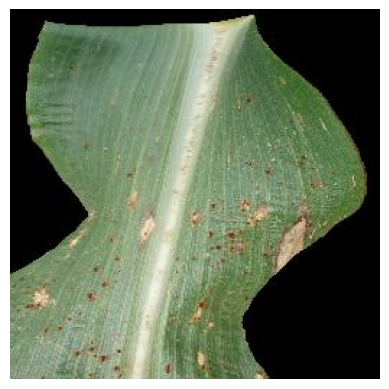

1/1 [==============================] - 0s 25ms/step
✅ Predicted Class: Class_10
✅ Confidence Score: 1.00


In [78]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = "data/Corn_(maize)___Common_rust_/Copy of RS_Rust 2553.JPG"  # Change this path
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if required

# Display the image
plt.imshow(img)
plt.axis("off")
plt.show()

# Make prediction
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
confidence = np.max(predictions)

# Get the predicted class name
predicted_class = class_names[predicted_index] if predicted_index < len(class_names) else f"Unknown_{predicted_index}"

print(f"✅ Predicted Class: {predicted_class}")
print(f"✅ Confidence Score: {confidence:.2f}")
